<a href="https://colab.research.google.com/github/yuho-ta/signate/blob/main/stockpricepred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# データの読み込み
train = pd.read_csv('/content/drive/MyDrive/signate/練習 株価の推移予測/train.csv')
test = pd.read_csv('/content/drive/MyDrive/signate/練習 株価の推移予測/test.csv')
samplesubmission = pd.read_csv('/content/drive/MyDrive/signate/練習 株価の推移予測/sample_submission.csv',header=None)

In [ ]:
y=train['Up']
train.drop(['Up'], axis=1, inplace=True)
all_data = pd.concat((train, test)).reset_index(drop=True)

In [ ]:
all_data['Date'] = pd.to_datetime(all_data['Date'], format="%Y/%m/%d")
all_data.sort_values(by='Date', ascending=True, inplace=True)
all_data['weekday'] = all_data['Date'].dt.weekday

In [ ]:
from datetime import datetime
from datetime import timedelta
start = datetime(2004,1,2)
all_data['weeks'] = (all_data['Date'] - start) // timedelta(weeks=1)

In [ ]:
all_data['Body'] =all_data['Open'] - all_data['Close']
all_data_rate = (all_data['Close']-all_data['Close'].shift(1))/all_data['Close'].shift(1)
all_data['Rate'] = all_data_rate
all_data['Rate']=all_data['Rate'].fillna(0)

In [ ]:
train =  all_data.iloc[:2026]
test = all_data.iloc[2026:, :]

In [ ]:
train = pd.concat([train,  y.reset_index(drop=True)], axis=1)

In [ ]:
train.head(30)

,Date,Open,High,Low,Close,weekday,weeks,Body,Rate,Up
0,2004-01-02,50.85,50.91,50.62,50.72,4,0,0.13,0.000000,1
1,2004-01-05,50.75,50.84,50.61,50.79,0,0,-0.04,0.001380,1
2,2004-01-06,50.87,51.26,50.86,51.15,1,0,-0.28,0.007088,1
3,2004-01-07,51.45,51.54,51.29,51.51,2,0,-0.06,0.007038,0
4,2004-01-08,51.15,51.33,51.02,51.28,3,0,-0.13,-0.004465,0
5,2004-01-09,51.11,51.32,51.01,51.01,4,1,0.10,-0.005265,0
6,2004-01-12,50.80,50.90,50.55,50.87,0,1,-0.07,-0.002745,0
7,2004-01-13,50.90,50.98,50.53,50.61,1,1,0.29,-0.005111,1
8,2004-01-14,50.43,50.65,50.40,50.64,2,1,-0.21,0.000593,1
9,2004-01-15,51.01,51.27,50.70,51.01,3,1,0.00,0.007306,1


In [ ]:
train.set_index(keys='Date', inplace=True)
test.set_index(keys='Date', inplace=True)

In [ ]:
list_weeks = []
list_weeks = train['weeks'].unique()
train['week_days'] = 0
for i in list_weeks:
  train['week_days'][train['weeks'] == i] = len(train[train['weeks'] == i])
train = train[train['week_days'] == 5]
train =train[train['weekday'] != 4]
train.drop(['week_days'], axis=1, inplace=True)

<ipython-input-799-cf4df03e0e72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['week_days'][train['weeks'] == i] = len(train[train['weeks'] == i])


In [ ]:
column=['Open',	'High',	'Low',	'Close',	'weekday',	'weeks',	'Body',	'Rate']
from sklearn.preprocessing import StandardScaler
# 学習データ、検証データ、評価データに分割
X_trainval, X_test, y_trainval, y_test = train_test_split(train[column][1:], train['Up'][1:], test_size=0.20, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.25, shuffle=False)

# 標準化を伴いながら num_date日間ごとに株価データを積み重ねる関数
def std_to_np(df):
    df_list = []
    df = np.array(df)
    for i in range(0, len(df) - 5, 6):
        df_s = df[i:i+6]
        scl = StandardScaler()
        df_std = scl.fit_transform(df_s)
        df_list.append(df_std)
    return np.array(df_list)

# 学習データ、検証データ、評価データの説明変数の変形と変換
X_train_t =  std_to_np(X_train)
X_val_t = std_to_np(X_val)
X_test_t = std_to_np(X_test)

In [ ]:
# 学習データ、検証データ、評価データの目的変数の変形と変換
y_train_t = y_train[5::6]
y_val_t = y_val[5::6]
y_test_t = y_test[5::6]

In [ ]:
# keras.modelsからSequentialのインポート
from keras.models import Sequential
# keras.layersからDense、LSTMのインポート
from keras.layers import Dense, LSTM
# Dropoutのインポート
from keras.layers import Dropout

from keras.regularizers import l2

In [ ]:
# LSTM構築とコンパイル関数
def lstm_comp(df):
    # 入力層/中間層/出力層のネットワークを構築
    model = Sequential()
    model.add(LSTM(256, activation='relu', batch_input_shape=(None, df.shape[1], df.shape[2]), kernel_regularizer=l2(0.1)))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    # ネットワークのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
model = lstm_comp(X_train_t)
result = model.fit(x=X_train_t, y=y_train_t, epochs=40, batch_size=24, validation_data=(X_val_t,y_val_t))

Epoch 1/40
6/6 [==============================] - 2s 83ms/step - loss: 2.1550 - accuracy: 0.4892 - val_loss: 1.9417 - val_accuracy: 0.6522
Epoch 2/40
6/6 [==============================] - 0s 25ms/step - loss: 1.8230 - accuracy: 0.5540 - val_loss: 1.6528 - val_accuracy: 0.6739
Epoch 3/40
6/6 [==============================] - 0s 26ms/step - loss: 1.5611 - accuracy: 0.5755 - val_loss: 1.4130 - val_accuracy: 0.6957
Epoch 4/40
6/6 [==============================] - 0s 26ms/step - loss: 1.3444 - accuracy: 0.6043 - val_loss: 1.2259 - val_accuracy: 0.6522
Epoch 5/40
6/6 [==============================] - 0s 23ms/step - loss: 1.1717 - accuracy: 0.6043 - val_loss: 1.0768 - val_accuracy: 0.6522
Epoch 6/40
6/6 [==============================] - 0s 24ms/step - loss: 1.0348 - accuracy: 0.6331 - val_loss: 0.9695 - val_accuracy: 0.6522
Epoch 7/40
6/6 [==============================] - 0s 26ms/step - loss: 0.9369 - accuracy: 0.6259 - val_loss: 0.8767 - val_accuracy: 0.6739
Epoch 8/40
6/6 [===========

In [ ]:
test=std_to_np(test)
pred = model.predict(test)
pred = np.round(pred)

7/7 [==============================] - 0s 6ms/step


In [ ]:
pred = [int(value) for value in pred]
result_df = pd.concat([samplesubmission.iloc[:, 0],pd.Series(pred)], axis=1)
result_df.to_csv('/content/drive/MyDrive/signate/練習 株価の推移予測/submit.csv', header=False, index=False)

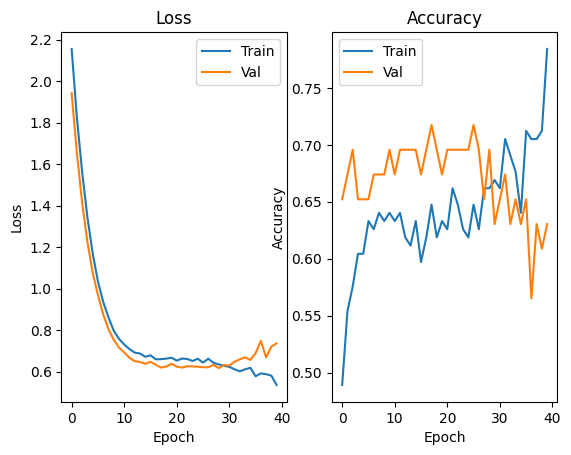

In [ ]:
# matplotlibのインポート
from matplotlib import pyplot as plt

# 損失のグラフの描画
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Train', 'Val'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')

# 正解率のグラフの描画
plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['Train', 'Val'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')

# 描画の実行
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
pred_prob = model.predict(X_test_t)
pred = np.round(pred_prob)
accuracy = accuracy_score(y_true=y_test_t, y_pred=pred)
print('評価データの正解率:', accuracy)

2/2 [==============================] - 0s 8ms/step
評価データの正解率: 0.6304347826086957
